# `ecg_00.jpynb`: Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.



## 1. Open an ECG file into the `ecg` variable
We want to read the file `ECG_hz.txt` from the `data` folder.  
We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [96]:
fNameECG = "/Users/duhameleve/Desktop/M2 SNS/S1 /Github/HAH913E-2024-ECG_001/data/ECGu.txt"


However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

In [97]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "/Users/duhameleve/Desktop/M2 SNS/S1 /Github/HAH913E-2024-ECG_001/data/ECGu.txt"

### 1.2. Read the ecg file

In [98]:
import numpy as np 

ecg = np.genfromtxt(fNameECG, delimiter=' ')

# 2. Plot the content of the `egc` variable 

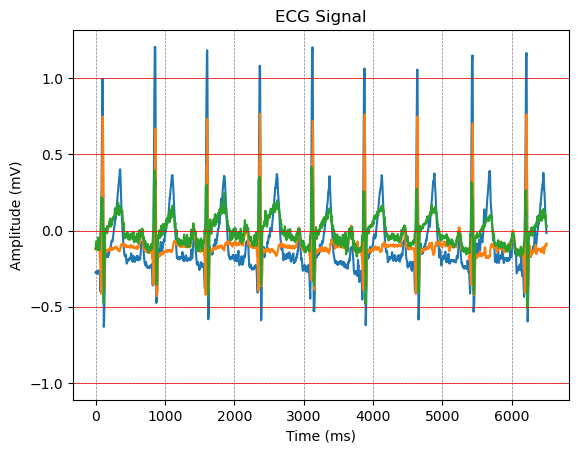

ecg_00.ipynb finished


In [99]:
 

# Conversion de l'ECG de microvolts à millivolts
ecg_mV = ecg/1000 


plt.plot(ecg_mV)  
plt.title('ECG Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)') 

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Quadrillage de fond

# Ajouter des lignes rouges tous les 0,5 mV
for y in np.arange(-1, 1.1, 0.5):  # Crée une ligne rouge tous les 0,5 mV
    plt.axhline(y=y, color='red', linestyle='-', linewidth=0.5)

plt.show()

print("ecg_00.ipynb finished")



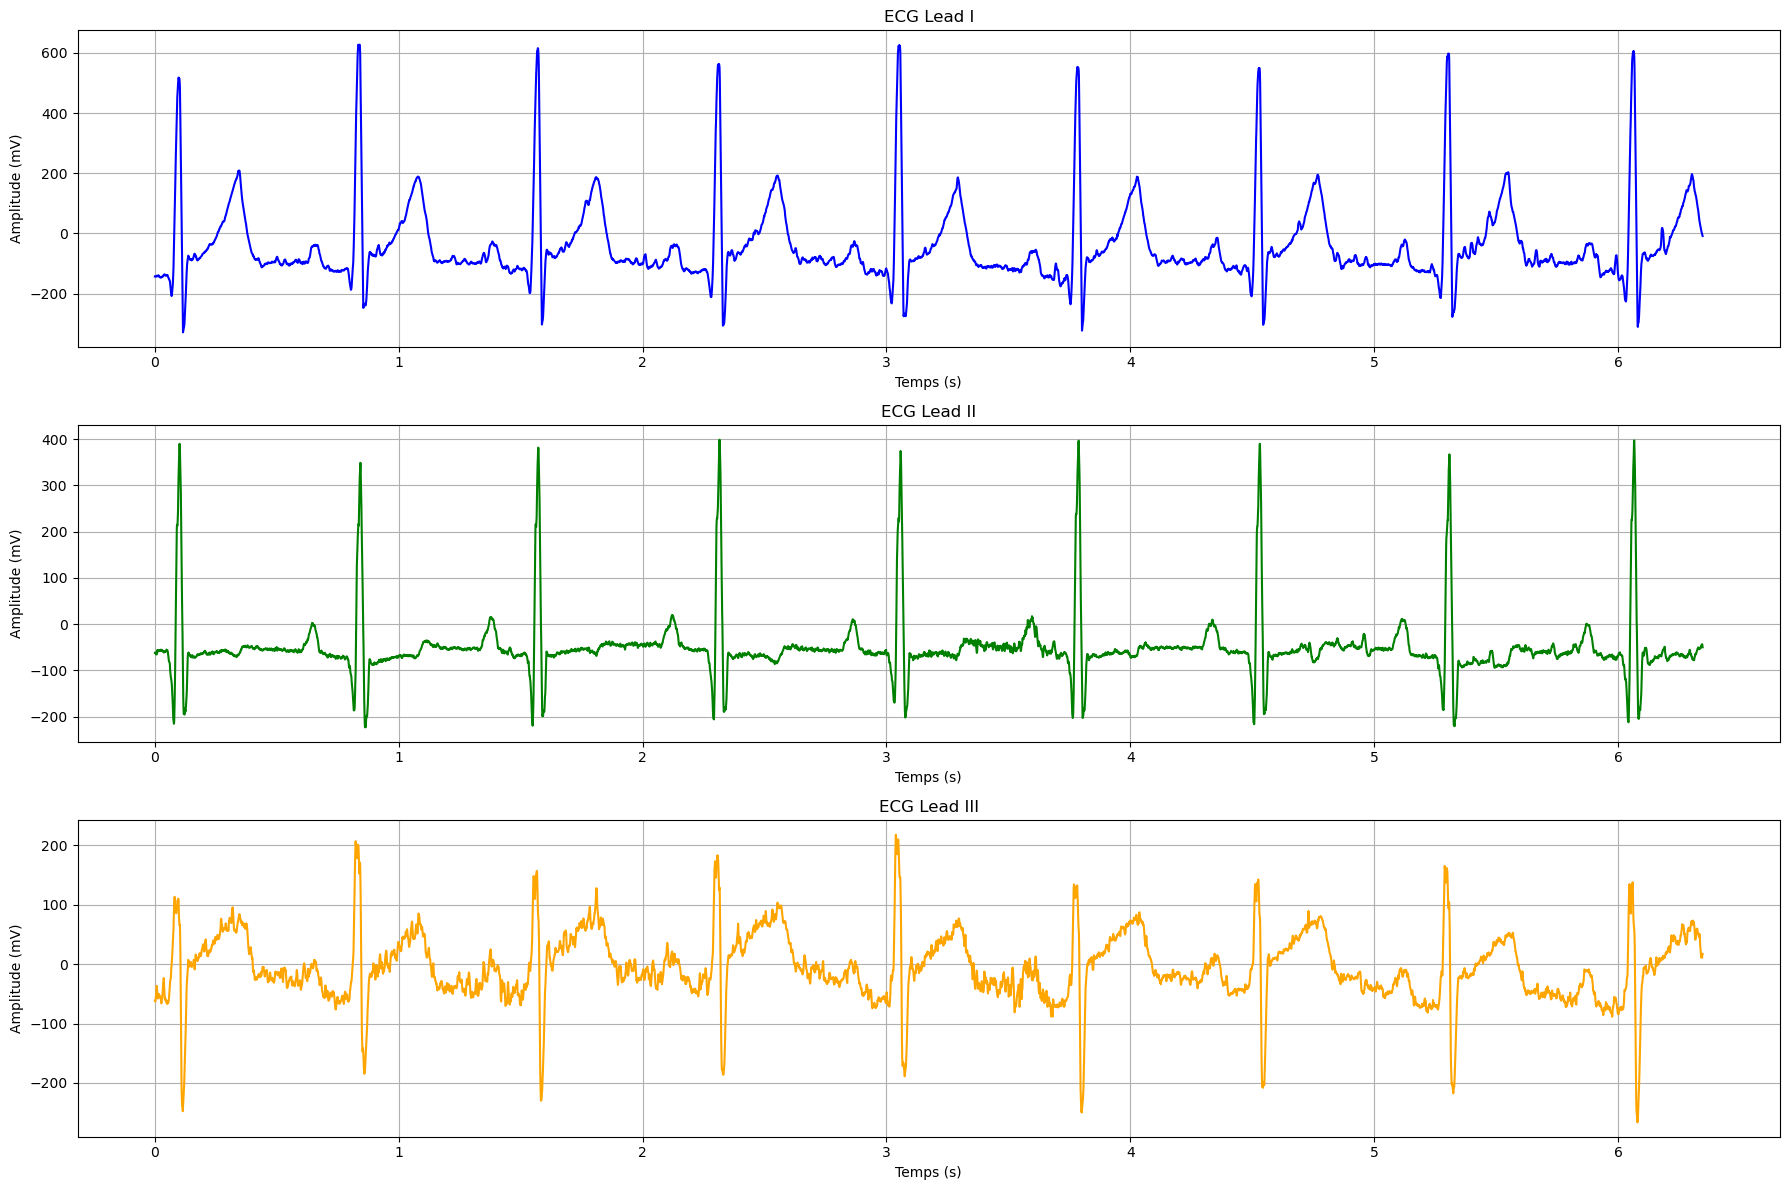

In [3]:

import matplotlib.pyplot as plt

sampling_frequency = 1024 
gain = 520  

file_path = '/Users/duhameleve/Desktop/M2 SNS/S1 /Github/HAH913E-2024-ECG_001/data/ECGu.txt'  
data = np.loadtxt(file_path) #charger des données/ lire à partir d'un fichier texte et les stocker dans une variable NumPy. 
#Ici on importe les données sous forme tableau ou matrice à partir d'un fichier Txt 

lead_1 = data[:, 0]
lead_2 = data[:, 1]
lead_3 = data[:, 2]


#L'ecg est mesurés par un convertisseur analogique-numérique (A/N) et enregistrés en unités arbitraires non interprétables
#Ces valeurs doivent être converties en microvolts (µV) pour qu'elles aient un sens physiologique. Ainsi le Gain sert de facteur de conversion.
#Il indique combien de microvolts correspondent à une unité du signal mesuré. Ici, le gain est de 520 µV par unité.
#Ainsi je passe en microV en appliquant le gain puis en mV
lead_1_mv = (lead_1 * gain) / 1000
lead_2_mv = (lead_2 * gain) / 1000
lead_3_mv = (lead_3 * gain) / 1000

# Création d'un vecteur de temps qui correspond aux échantillons de données de l'ECG en se basant sur le fréquence d'échantillonage
# indiqué par le fabricant = 1024 Hz. 
time = np.arange(len(lead_1)) / sampling_frequency

#Je définie ici la fenêtre d'affichage des mes graphiques. 
plt.figure(figsize=(18, 12))

#Lead I
plt.subplot(3, 1, 1) #permet de créer une figure avec 3 lignes et 1 colonne. Sachant qu'ici nous traçon le premier sous graphique. 
plt.plot(time, lead_1_mv, label='Lead I', color='blue')
plt.title('ECG Lead I')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True) #ajout d'une grille derrière le graph. 

#Lead II
plt.subplot(3, 1, 2)
plt.plot(time, lead_2_mv, label='Lead II', color='green')
plt.title('ECG Lead II')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)

#Lead III
plt.subplot(3, 1, 3)
plt.plot(time, lead_3_mv, label='Lead III', color='orange')
plt.title('ECG Lead III')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)

plt.tight_layout() #j'ajuste l'espace entre chaque graphique. 
plt.show()


### Application d'un filtre passe bas 

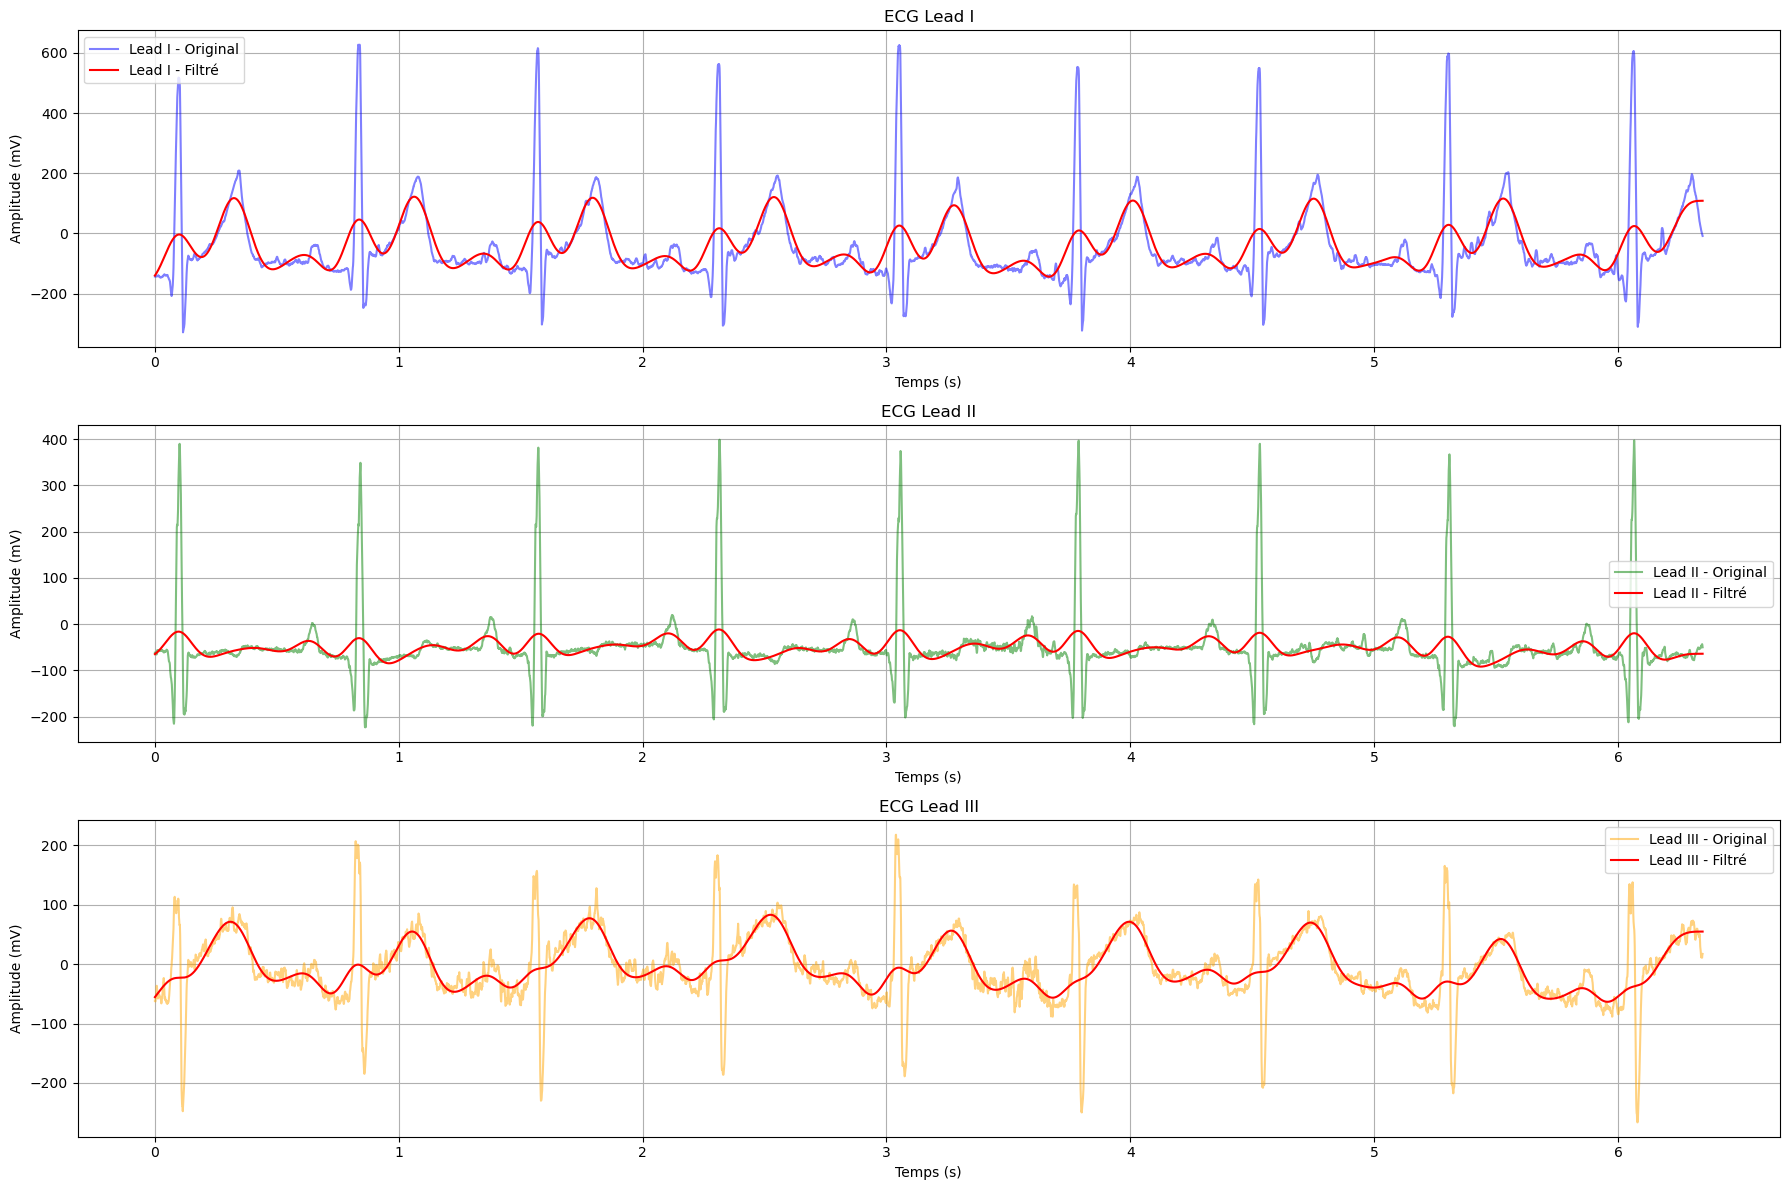

In [7]:
#On applique ici un filtre passe bas afin de conserver les composantes de basse fréquence du signal d'origine.
from scipy.signal import butter, filtfilt

sampling_frequency = 1024  
gain = 520 


# Création d'un vecteur de temps basé sur la fréquence. 
time = np.arange(len(lead_1)) / sampling_frequency

# Définir les paramètres du filtre passe-bas
cutoff_freq = 5  # Fréquence de coupure en Hz
order = 4  # Ordre du filtre

# Concevoir le filtre passe-bas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyq  # Normaliser la fréquence de coupure, être sur que la fréquence de coupure est comprise entre 0 et 1 
    #Ici la fréquence de coupure est de 5 Hz et la fréquence d'échantillonage de 1024 Hz, ainsi la fréquence de Nquist est de 512Hz, normalisé cela donne 5/512.
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # retour des coef d'échantillonage afin d'appliquer le filtre au signal. 
    return b, a

# Appliquer le filtre passe-bas
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)  # Concevoir le filtre
    y = filtfilt(b, a, data)  # Appliquer le filtre
    return y

# Filtrer les signaux ECG
filtered_lead_1 = lowpass_filter(lead_1_mv, cutoff_freq, sampling_frequency, order)
filtered_lead_2 = lowpass_filter(lead_2_mv, cutoff_freq, sampling_frequency, order)
filtered_lead_3 = lowpass_filter(lead_3_mv, cutoff_freq, sampling_frequency, order)

# Création d'une fenêtre d'affichage pour les graphiques
plt.figure(figsize=(18, 12))

# Lead I
plt.subplot(3, 1, 1)  
plt.plot(time, lead_1_mv, label='Lead I - Original', color='blue', alpha=0.5)# On ajoute avec label une légende afin de distinguer le lead filtré et non filtré. 
plt.plot(time, filtered_lead_1, label='Lead I - Filtré', color='red') # on ajoute ici le tracé des valeurs filtrées correspondantes. 
plt.title('ECG Lead I')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()

# Lead II
plt.subplot(3, 1, 2)  
plt.plot(time, lead_2_mv, label='Lead II - Original', color='green', alpha=0.5)
plt.plot(time, filtered_lead_2, label='Lead II - Filtré', color='red')
plt.title('ECG Lead II')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()

# Lead III
plt.subplot(3, 1, 3)  
plt.plot(time, lead_3_mv, label='Lead III - Original', color='orange', alpha=0.5)
plt.plot(time, filtered_lead_3, label='Lead III - Filtré', color='red')
plt.title('ECG Lead III')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()

plt.tight_layout()  # Ajuster l'espace entre les graphiques
plt.show()


# QUESTIONS
## Does this ECG look correctly scaled to you? Please explain


Cet ECG présente une échelle peu cohérente pour les lead I, II et III. En effet, les amplitudes des ondes ne sont pas dans la plage normale de 1 à 2 mV. Les ondes dépassent les 1.5 mV ( qui est une valeur standard pour un ECG), cela pourrait indiquer un problème d'échelle ou une anomalie.


## Is this a normal ECG? Please explain.

Cet ECG, conformément aux spécifications du fabricant, présente les dérivations D1, D2 et D3, correspondant aux enregistrements effectués sur les membres de l'individu. L'enregistrement semble conforme, avec la durée des complexes QRS apparaissant comme inférieure à 120 ms, ce qui est conforme aux valeurs physiologiques attendues pour ce type de signal. 

De plus sur une période de 6 secondes, 8 complexes QRS sont observés, ce qui correspond à une fréquence cardiaque de 80 battements par minute (bpm). Chez un sujet au repos, la fréquence cardiaque normale se situe entre 50 et 90 bpm, indiquant que cet ECG est compatible avec un rythme cardiaque normal.